# **Introduction**

In the tutorials, we are going to go through the materials we learned during the week and run some codes to help with the comprehension of the contents.
These are the topics that will be covered in the first tutorial:

*   Linear Regression
*   Classification



# **Linear Regression**

In [ ]:
# Importing some packages
import numpy as np # for numerical analysis
import pandas as pd # for dataframe manipulation
from tensorflow import keras
import matplotlib.pyplot as plt # for plotting data
from sklearn import linear_model # to use linear models in library
from sklearn.model_selection import train_test_split 
from sklearn import metrics # to evaluate the performance
from sklearn.linear_model import LinearRegression


First, Lets recall Simple Linear Regression from the course.




Imagine we have a feature, $X$, and an output, $Y$, and we want to extract how they are related to each other. We assume the relationship between the output and feature is approximately Linear. The goal is to find the slope (a) and intercept (b) that satisfies the equation:
$ Y = a*X + b$ with the minimum error.

Now lets generate a random variable with 30 points and call it our feature X. 


Text(0.5, 1.0, 'Linear Regresion')

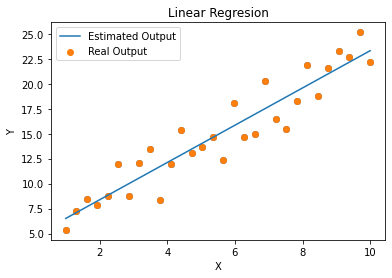

In [ ]:
# generating the shift of each data point from the line
# np.random.seed(0)
random_shifts = np.random.rand(30)

# generating the feature X and Output Y
X = np.linspace(1,10, 30)
Y = 2*X + 7*random_shifts

# Plotting Y versus X
plt.scatter(X, Y); 

Model = LinearRegression(fit_intercept=True)
Model.fit(X[:, np.newaxis], Y)

Xfit = np.linspace(1, 10, 1000)

Yfit = Model.predict(Xfit[:, np.newaxis])

plt.scatter(X, Y, label='Real Output')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(Xfit, Yfit,label='Estimated Output');
plt.legend()
plt.title('Linear Regresion')


Now lets try a feature set and Multivaraiate Linear Regression. 

We take the Boston Housing dataset that contains information about different houses in Boston. We have the access to this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. We want to predict the value of prices of the house in test set using the given features after training model by train set.

Let's start by importing the data from library and understand how to work on it. 



In [ ]:
from sklearn.datasets import load_boston
BostonDataset = load_boston()

# Extract the content of the dataset:
print(BostonDataset.keys())
# feature set size
print(BostonDataset.data.shape)
# target size
print(BostonDataset.target.shape)
# name of the features with their description
print(BostonDataset.feature_names)
# data description
print(BostonDataset.DESCR)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

In [ ]:
Features = pd.DataFrame(BostonDataset.data, columns = BostonDataset.feature_names)
Target = pd.DataFrame(BostonDataset.target, columns=['Target'])
df = Features.join(Target)
# features and target at different samples
print(df)
# Features.isnull().sum(): To check if there is any missing value in the dataset

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88    11.9

[50

We want to build a linear model using a training dataset and then perform prediction on unseen or test dataset to evaluate the performance of our model.


In [ ]:
Data_train, Data_test, Target_train, Target_test = train_test_split(BostonDataset.data, BostonDataset.target, test_size = 0.2, random_state=5)
print(Data_train.shape)
print(Data_test.shape)
print(Target_train.shape)
print(Target_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


Now, lets use linear regression to build our model:


In [ ]:
from sklearn.metrics import mean_squared_error

Model = LinearRegression()
Model.fit(Data_train, Target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We learned about two evaluation methods in the course: $RSE$ and $R^2$. Let's calculate them by coding now.

RSE_train = 4.752779894843371
R^2_train = 0.738339392059052
RSE_test = 4.613748804112152
R^2_test = 0.7334492147453064


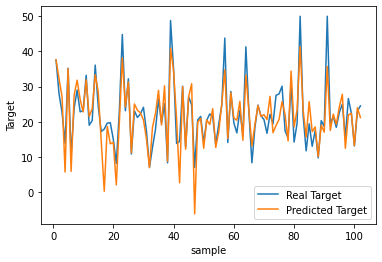

In [ ]:
import math 
from  sklearn.metrics import r2_score
# Evaluate the model performance on the train dataset
Target_train_predict = Model.predict(Data_train)
RSS_train = ((Target_train_predict-Target_train)**2).sum()

RSE_train = math.sqrt(RSS_train/(Data_train.shape[0]-2))
R2_train = r2_score(Target_train, Target_train_predict)
print('RSE_train =', RSE_train)
print('R^2_train =', R2_train)

# Evaluate the model performance on the test dataset

Target_test_predict = Model.predict(Data_test)
RSS_test = ((Target_test_predict-Target_test)**2).sum()

RSE_test = math.sqrt(RSS_test/(Data_test.shape[0]-2))
R2_test = r2_score(Target_test, Target_test_predict)
print('RSE_test =', RSE_test)
print('R^2_test =', R2_test)

plt.plot(np.linspace(1,102,102), Target_test,label='Real Target')
plt.plot(np.linspace(1,102,102), Target_test_predict,label='Predicted Target')

plt.xlabel('sample')
plt.ylabel('Target')
plt.legend()

# **Classification**

**Linear Discriminant Analysis**


Lets make a classification dataset ourselves. Imagine we have a dataset with 2000 samples and 20 informative features at each sample (non is derived from the other one). These data consists of two classes: 0,1.
We need to split this generated dataset again to train and test. We fit our model using the training dataset and then apply it to test data for classification.

In [ ]:
from sklearn.datasets import make_classification # for generating the classification dataset
X, Y = make_classification(n_samples=2000, n_features=20, n_classes=2, n_informative=20, n_redundant=0, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X.shape)
print(X_train.shape)
print(Y.shape)
print(Y_train.shape)

(2000, 20)
(1600, 20)
(2000,)
(1600,)


Now, we want to use LDA for the classification purpose. We know the chance level is 50% for the accuracy and let's see how much can we get with a simple and straight forward usage of features to fit LDA.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)

Y_predict = LDA.predict(X_test)
print(Y_predict)


[1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1]


**Evaluation**

Let's evaluate the classifier at the next step. We first calculate the confusion matrix and then plot the ROC curve.

TPR = 0.8275862068965517
FPR = 0.19289340101522842
Accuracy = 0.8175
Accuracy =  0.8175


Text(0.5, 1.0, 'ROC Curve')

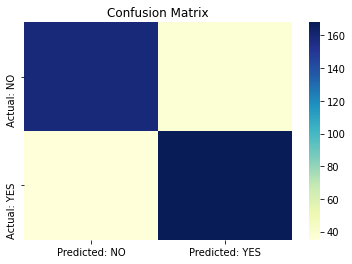

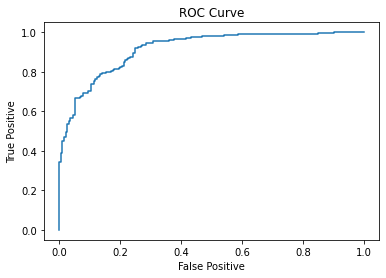

In [ ]:
from sklearn.metrics import roc_curve
import seaborn as sns
Conf_Mat = confusion_matrix(Y_predict,Y_test)
Conf_Mat_frame = pd.DataFrame(Conf_Mat, columns = ['Predicted: NO','Predicted: YES'], index=['Actual: NO','Actual: YES'])
sns.heatmap(pd.DataFrame(Conf_Mat_frame), cmap="YlGnBu")
plt.title('Confusion Matrix')

TPR = Conf_Mat[1,1]/(Conf_Mat[1,1] + Conf_Mat[1,0])
FPR = Conf_Mat[0,1]/(Conf_Mat[0,1] + Conf_Mat[0,0])
Accr = (Conf_Mat[1,1]+Conf_Mat[0,0])/(Conf_Mat[0,0]+Conf_Mat[1,1]+Conf_Mat[1,0]+Conf_Mat[0,1])
print('TPR =', TPR)
print('FPR =',FPR)
print('Accuracy =',Accr)
# we can also use the command:
Acc = accuracy_score (Y_predict, Y_test)
print('Accuracy = ',Acc)

dec_test = LDA.decision_function(X_test)

Falsa_Positive_Rate, True_Positive_Rate, _ = roc_curve(Y_test, dec_test)
plt.figure()
plt.plot(Falsa_Positive_Rate,True_Positive_Rate)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')



**Homework&Practice:**

That would be a great practice to tickle the data and processing steps a bit to see how you can improve the performance of both regression and classification.

Please feel free to share your ideas and thoughts on Piazza to discuss them with me or your classmates and maybe challenge them regarding their ideas.

If you also have any questions, please send it on Piazza. I try answering as soon as possible.